In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import corner

from cmcrameri import cm
from matplotlib.lines import Line2D
from matplotlib.colors import to_hex
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

from pqcd.utils import (
    rcparams,
    to_nucleons_per_cubic_femtometre,
    GeV_per_cubic_femtometer_to_dyn_per_square_cm,
    nsat
)
plt.rcParams.update(rcparams)

In [2]:
# Load the collated EOSs
collated_eos_with_ntov = pd.read_csv(
    '../data/eos-draws-default/collated_np_all_post.csv',
    index_col='eos'
)

collated_eos = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default.csv',
    index_col='eos'
)

collated_eos_nonzero_astro = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default-nonzero-astro.csv',
    index_col='eos'
)

In [3]:
collated_eos_nonzero_astro['ntov'] = collated_eos_with_ntov['rhoc(M@Mmax)']
collated_eos_nonzero_astro['R14'] = collated_eos_with_ntov['R(M=1.4)']
collated_eos['ntov'] = collated_eos_with_ntov['rhoc(M@Mmax)']
collated_eos['R14'] = collated_eos_with_ntov['R(M=1.4)']

In [4]:
collated_eos

,Mmax,logweight_Fonseca_J0740,logweight_Antoniadis_J0348,logweight_Choudhury_J0437,logweight_Miller_J0030,logweight_Miller_J0740,logweight_GW170817,logweight_GW190425,logweight_total,prior_weight,...,pqcd_weight_04nsat_marg,pqcd_weight_05nsat_marg,pqcd_weight_06nsat_marg,pqcd_weight_07nsat_marg,pqcd_weight_08nsat_marg,pqcd_weight_09nsat_marg,pqcd_weight_10nsat_marg,pqcd_weight_ntov_marg,ntov,R14
eos,,,,,,,,,,,,,,,,,,,,,
2265967.0,1.700984,-inf,-inf,9.139681,7.747685,-16.864775,6.864917,10.745082,-inf,1.0,...,1.940646e+00,8.824477e-01,6.570784e-01,7.641706e-01,8.871744e-01,6.195453e-01,2.972633e-01,6.486130e-01,1.547739e+15,11.985060
264698.0,1.590114,-inf,-inf,-149.884999,-179.692122,-182.080274,6.529798,8.000491,-inf,1.0,...,2.925155e-13,1.501931e-13,6.161123e-04,1.087061e-03,8.171000e-04,1.657824e-03,3.420629e-03,2.432516e-03,3.107859e+15,8.100073
1683176.0,0.402205,-inf,-inf,-inf,-inf,-inf,6.397435,9.827886,-inf,1.0,...,5.861462e-12,7.471722e-24,5.946048e-38,4.656537e-52,9.785558e-66,1.160765e-77,2.593685e-89,5.259816e+00,3.500704e+14,4.130000
696150.0,0.860414,-inf,-inf,-inf,-inf,-inf,5.889025,10.090964,-inf,1.0,...,1.471018e-08,1.606827e-17,1.731792e-09,2.089993e-14,4.860918e-21,1.018328e-27,1.624899e-35,6.432132e-44,2.981789e+15,4.130000
275937.0,1.236473,-inf,-inf,-534.732271,-325.212510,-570.617845,5.509491,9.061773,-inf,1.0,...,1.784641e-08,5.976240e-15,7.018021e-18,3.931255e-23,6.406636e-29,8.239190e-32,3.519135e-28,4.856527e-13,3.360000e+15,4.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280847.0,0.891053,-inf,-inf,-inf,-inf,-inf,6.062024,9.828265,-inf,1.0,...,2.671904e-07,1.070804e-16,1.011323e-28,2.772902e-41,9.913189e-54,9.915579e-65,6.064494e-76,0.000000e+00,1.000000e+16,4.130000
459317.0,0.590972,-inf,-inf,-inf,-inf,-inf,6.066148,10.137624,-inf,1.0,...,4.949548e-12,5.649410e-22,8.664517e-35,6.389324e-48,8.032261e-61,4.012421e-72,8.726475e-84,1.271095e-55,2.036261e+15,4.130000
2234499.0,1.665527,-inf,-inf,9.328456,8.516454,-27.897028,6.638680,10.012461,-inf,1.0,...,1.564382e+00,1.126912e+00,4.697233e-01,1.203565e-01,5.076820e-02,1.924982e-01,3.922311e-01,1.995363e-01,1.768362e+15,12.147656


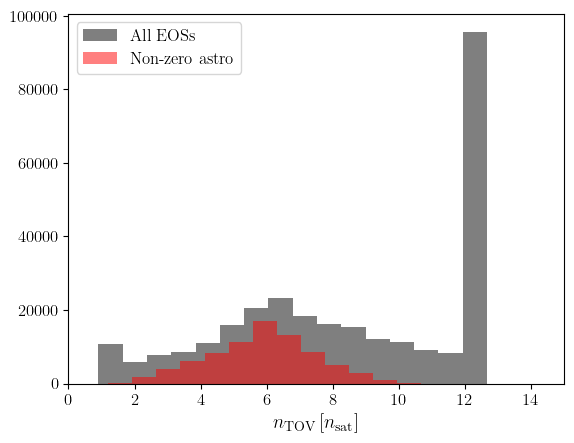

In [5]:
fig, ax = plt.subplots()

ax.hist(
    to_nucleons_per_cubic_femtometre(collated_eos['ntov'])/nsat, 
    bins=50, 
    color='black', 
    alpha=0.5, 
    label='All EOSs'
)
ax.hist(
    to_nucleons_per_cubic_femtometre(collated_eos_nonzero_astro['ntov'])/nsat, 
    bins=50, 
    color='red', 
    alpha=0.5, 
    label='Non-zero astro'
)

ax.set_xlabel(r'$n_{\rm TOV}\, [n_{\rm sat}]$')

ax.set_xlim(0, 15)

ax.legend();

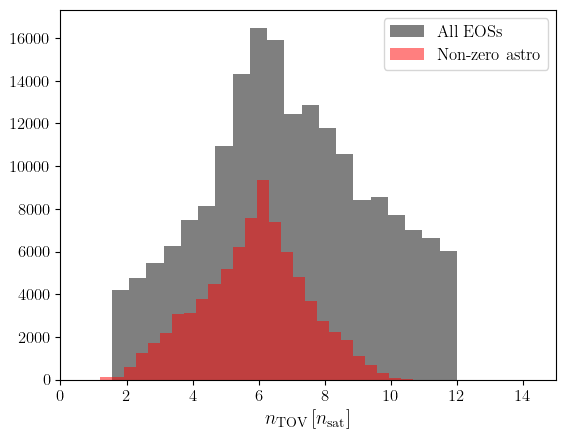

In [6]:
ntov_mask = (
    (to_nucleons_per_cubic_femtometre(collated_eos['ntov']) > 1.5*nsat) &
    (to_nucleons_per_cubic_femtometre(collated_eos['ntov']) < 12*nsat)
)

fig, ax = plt.subplots()

ax.hist(
    to_nucleons_per_cubic_femtometre(collated_eos['ntov'][ntov_mask])/nsat, 
    bins=20,
    color='black', 
    alpha=0.5,
    label='All EOSs'
)
ax.hist(
    to_nucleons_per_cubic_femtometre(collated_eos_nonzero_astro['ntov'])/nsat, 
    bins=100, 
    color='red',
    alpha=0.5,
    label='Non-zero astro'
)

ax.set_xlabel(r'$n_{\rm TOV}\, [n_{\rm sat}]$')

ax.set_xlim(0, 15)

ax.legend();

In [7]:
# nterm = 10nsat
nterm_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_10nsat_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_10nsat_marg.dat')
]

In [8]:
ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

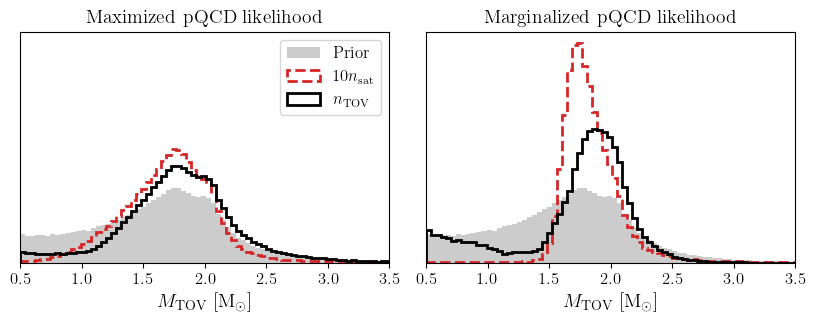

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)

axs[0].set_title('Maximized pQCD likelihood')
axs[1].set_title('Marginalized pQCD likelihood')

mass_cut = 0.5
plot_mask = collated_eos['Mmax'] > mass_cut

bins = 100

# Prior
# -----

for ax in axs:
    ax.hist(
        collated_eos['Mmax'][plot_mask], 
        bins=bins, 
        density=True, 
        color='k', 
        alpha=0.2,
        label='Prior'
    )

# nterm = 10nsat
# --------------

axs[0].hist(
    collated_eos['Mmax'][plot_mask], 
    bins=bins, 
    density=True, 
    histtype='step',
    alpha=1,
    color='C3',
    linewidth=2,
    linestyle='--',
    weights=nterm_weights[0][plot_mask],
    label='$10n_\mathrm{sat}$'
)

axs[1].hist(
    collated_eos['Mmax'][plot_mask], 
    bins=bins, 
    density=True, 
    histtype='step',
    alpha=1,
    color='C3',
    linewidth=2,
    linestyle='--',
    weights=nterm_weights[1][plot_mask]
)

# nterm = ntov
# ------------

axs[0].hist(
    collated_eos['Mmax'][plot_mask], 
    bins=bins, 
    density=True, 
    histtype='step',
    alpha=1,
    color='k',
    linewidth=2,
    weights=ntov_weights[0][plot_mask],
    label='$n_\mathrm{TOV}$'
)

axs[1].hist(
    collated_eos['Mmax'][plot_mask], 
    bins=bins, 
    density=True, 
    histtype='step',
    alpha=1,
    color='k',
    linewidth=2,
    weights=ntov_weights[1][plot_mask],

)

# ---

axs[0].set_yticks([])
axs[0].set_xlim(0.5, 3.5)

axs[0].legend()

for ax in axs:
    ax.set_xlabel('$M_\mathrm{TOV}$ [M${}_\odot$]')

fig.savefig('figures/paper/')

In [10]:
mask = collated_eos['R14'] > 5

In [31]:
nterm_list = [4,5,6,7,8]

c_dict = {
    nterm: cm.berlin(i/(len(nterm_list)-1)) for i, nterm in enumerate(nterm_list)
}

linestyles = 2*['-', '--', '-.', ':']
ls_dict = {
    nterm: linestyles[i] for i, nterm in enumerate(nterm_list)
}

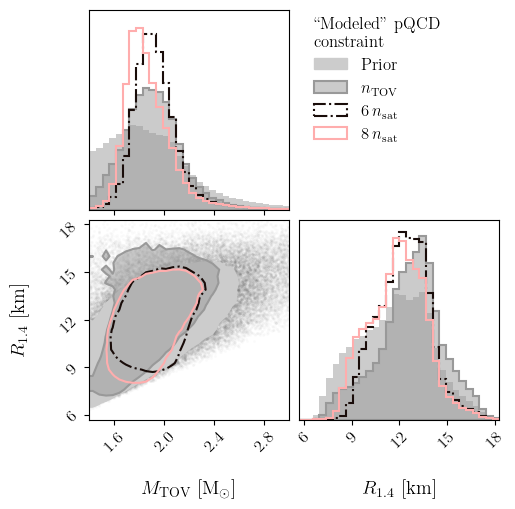

In [65]:
plot_range = [[1.4, 3], [5.7, 18.3]]

# Prior
# -----

fig = corner.corner(
    collated_eos[['Mmax', 'R14']][mask], 
    labels=[r'$M_{\rm TOV}$ [M$_\odot$]', r'$R_{1.4}$ [km]'],
    bins=30, 
    levels=[0.9],
    range=plot_range,
    smooth=0.5,
    color='k',
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=True,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'colors': '#cccccc', 'antialiased': True},
    hist_kwargs={'density': True, 'histtype': 'stepfilled', 'color': '#cccccc'}
)

# nTOV
# ----

corner.corner(
    collated_eos[['Mmax', 'R14']][mask], 
    weights=ntov_weights[1][mask],
    fig=fig,
    bins=30, 
    levels=[0.9],
    range=plot_range,
    smooth=0.5,
    color='#999999', 
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linewidths': 1.5},
    contourf_kwargs={'colors': '#999999', 'antialiased': True, 'alpha': 0.5},
    hist_kwargs={'density': True, 'histtype': 'stepfilled', 'edgecolor': '#999999', 'linewidth': 1.5, 'facecolor': [0.6, 0.6, 0.6, 0.5]}
)

# nterm
# -----

for i, nterm in enumerate([6,8]):
    
    weights = np.loadtxt(
        f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat'
    )

    color = c_dict[nterm]
    linestyle = ls_dict[nterm]

    corner.corner(
        collated_eos[['Mmax', 'R14']][mask], 
        weights=weights[mask],
        fig=fig,
        bins=30, 
        levels=[0.9],
        range=plot_range,
        smooth=0.5,
        color=to_hex(color),
        plot_datapoints=False,
        fill_contours=False,
        plot_density=False,
        no_fill_contours=True,
        contour_kwargs={'linewidths': 1.5, 'linestyles': linestyle},
        hist_kwargs={'density': True, 'histtype': 'step', 'color': to_hex(color), 'linewidth': 1.5, 'linestyle': linestyle}
    );

# ---

handles = [
    mpatches.Patch(color='#cccccc', label='Prior'),
    mpatches.Patch(edgecolor= '#999999', linewidth= 1.5, facecolor= [0.6, 0.6, 0.6, 0.5],  label='$n_\mathrm{TOV}$')
]

for nterm in [6,8]:
    handles.append(
        mpatches.Patch(edgecolor=c_dict[nterm], linewidth=1.5, facecolor= [0.6, 0.6, 0.6, 0.0], linestyle=ls_dict[nterm], label=f'${nterm}\,n_\mathrm{{sat}}$')
    )

l = fig.legend(
    handles=handles, 
    loc='upper right', 
    bbox_to_anchor=(0.85, 0.94),
    frameon=False,
    title='``Modeled" pQCD\nconstraint',
    title_fontsize=12
)

l._legend_box.align = "left"

fig.savefig('figures/paper/pqcd_marg_m_r_14_corner.pdf', bbox_inches='tight')

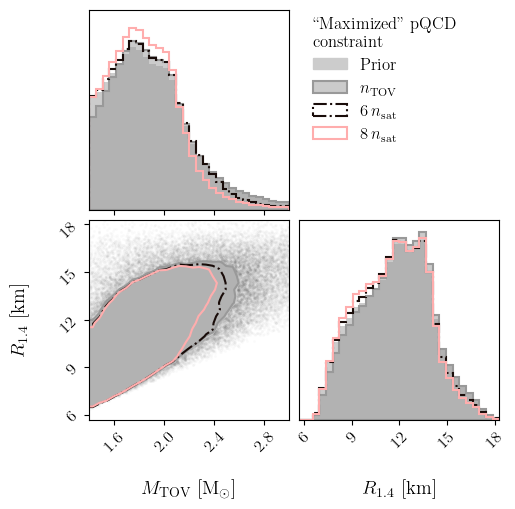

In [70]:
plot_range = [[1.4, 3], [5.7, 18.3]]

# Prior
# -----

fig = corner.corner(
    collated_eos[['Mmax', 'R14']][mask], 
    labels=[r'$M_{\rm TOV}$ [M$_\odot$]', r'$R_{1.4}$ [km]'],
    bins=30, 
    levels=[0.9],
    range=plot_range,
    smooth=0.5,
    color='k',
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=True,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'colors': '#cccccc', 'antialiased': True},
    hist_kwargs={'density': True, 'histtype': 'stepfilled', 'color': '#cccccc'}
)

# nTOV
# ----

corner.corner(
    collated_eos[['Mmax', 'R14']][mask], 
    weights=ntov_weights[0][mask],
    fig=fig,
    bins=30, 
    levels=[0.9],
    range=plot_range,
    smooth=0.5,
    color='#999999', 
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linewidths': 1.5},
    contourf_kwargs={'colors': '#999999', 'antialiased': True, 'alpha': 0.5},
    hist_kwargs={'density': True, 'histtype': 'stepfilled', 'edgecolor': '#999999', 'linewidth': 1.5, 'facecolor': [0.6, 0.6, 0.6, 0.5]}
)

# nterm
# -----

for i, nterm in enumerate([6,8]):
    
    weights = np.loadtxt(
        f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'
    )

    color = c_dict[nterm]
    linestyle = ls_dict[nterm]

    corner.corner(
        collated_eos[['Mmax', 'R14']][mask], 
        weights=weights[mask],
        fig=fig,
        bins=30, 
        levels=[0.9],
        range=plot_range,
        smooth=0.5,
        color=to_hex(color),
        plot_datapoints=False,
        fill_contours=False,
        plot_density=False,
        no_fill_contours=True,
        contour_kwargs={'linewidths': 1.5, 'linestyles': linestyle},
        hist_kwargs={'density': True, 'histtype': 'step', 'color': to_hex(color), 'linewidth': 1.5, 'linestyle': linestyle}
    );

# ---

handles = [
    mpatches.Patch(color='#cccccc', label='Prior'),
    mpatches.Patch(edgecolor= '#999999', linewidth= 1.5, facecolor= [0.6, 0.6, 0.6, 0.5],  label='$n_\mathrm{TOV}$')
]

for nterm in [6,8]:
    handles.append(
        mpatches.Patch(edgecolor=c_dict[nterm], linewidth=1.5, facecolor= [0.6, 0.6, 0.6, 0.0], linestyle=ls_dict[nterm], label=f'${nterm}\,n_\mathrm{{sat}}$')
    )

l = fig.legend(
    handles=handles, 
    loc='upper right', 
    bbox_to_anchor=(0.88, 0.94),
    frameon=False,
    title='``Maximized" pQCD\nconstraint',
    title_fontsize=12
)

l._legend_box.align = "left"

fig.savefig('figures/paper/pqcd_Xmarg_m_r_14_corner.pdf', bbox_inches='tight')

In [ ]:
fig.get_axes()[0].get_xlim()

In [ ]:
mass_cut_mask = collated_eos['logweight_Antoniadis_J0348'] > -np.inf
collated_eos_mass_cut = collated_eos[mass_cut_mask]

In [ ]:
collated_ntov = to_nucleons_per_cubic_femtometre(collated_eos['ntov'])

pressure_at_ntov = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_ntov.dat'
)
energy_density_at_ntov = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/energy_density_ntov.dat'
)

speed_of_sounds_squared_at_ntov = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/speed_of_sound_squared_ntov.dat'
)

In [ ]:
len(collated_ntov), len(pressure_at_ntov), len(energy_density_at_ntov), len(speed_of_sounds_squared_at_ntov)

In [ ]:
astro_weights = np.exp(collated_eos.logweight_total.values - max(collated_eos.logweight_total.values))

In [ ]:
mass_weights = np.exp(collated_eos.logweight_Antoniadis_J0348.values - max(collated_eos.logweight_Antoniadis_J0348.values))

# pQCD only, no mass cut

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
linewidth = 2
colors = [to_hex(cm.berlin(i/(len(nterm_list)-1))) for i in range(len(nterm_list))]

prior_c = '#cccccc'

ntov_c = 'k'
ntov_alpha = 0.4

# If you want to see all the nTOV values...
# eps_lim = (0, 10)
# p_lim = (0, 5)

# Or just the main group:
eps_lim = (0, 3)
p_lim = (0, 1.5)

# Or just the main group:
# eps_lim = (0.5, 1.75)
# p_lim = (0, 1)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)'
]

ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

nterm_weights = []
for nterm in nterm_list:
    nterm_weights.append([
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'),
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat')
    ]) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)
axs[0].text(0.04, 0.9, 'pQCD only', transform=axs[0].transAxes)

for i, ax in enumerate(axs):

    ax.set_title(titles[i])

    # Prior
    corner.hist2d(
        energy_density_at_ntov[ntov_mask], 
        pressure_at_ntov[ntov_mask], 
        ax=ax,
        # weights=astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color='k',
        plot_datapoints=True,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=True,
        data_kwargs={'alpha': 0.02},
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'colors': '#cccccc', 'antialiased': True},
    )

    # nTOV posterior
    weights = ntov_weights[i][ntov_mask]
    corner.hist2d(
        energy_density_at_ntov[ntov_mask], 
        pressure_at_ntov[ntov_mask], 
        ax=ax,
        weights=weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=ntov_c,
        plot_datapoints=False,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': ntov_alpha, 'antialiased': True},
    )
    
    # nterm posteriors
    for j, weights_max_marg in enumerate(nterm_weights):

        weights = weights_max_marg[i][ntov_mask]

        corner.hist2d(
            energy_density_at_ntov[ntov_mask], 
            pressure_at_ntov[ntov_mask], 
            ax=ax,
            weights=weights, 
            bins=30, 
            levels=[0.9],
            range=[eps_lim, p_lim],
            smooth=0.5,
            color=colors[j],
            plot_datapoints=False,
            fill_contours=False,
            no_fill_contours=True,
            plot_density=False,
            contour_kwargs={
                'linestyles': linestyles[j%len(linestyles)], 
                'linewidths': linewidth
            },
        )
    
twinx = axs[1].twinx()
twinx.set_ylim(GeV_per_cubic_femtometer_to_dyn_per_square_cm(np.array(axs[1].get_ylim())))
twinx.set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [dyn/cm$^2$]')

for ax in axs:
    ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
axs[0].set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [GeV/fm$^3$]');

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
linewidth = 2
colors = [to_hex(cm.berlin(i/(len(nterm_list)-1))) for i in range(len(nterm_list))]

prior_c = 'k'
prior_alpha = 0.2

ntov_c = 'k'
ntov_alpha = 0.4

# If you want to see all the nTOV values...
# eps_lim = (0, 10)
# p_lim = (0, 5)

# Or just the main group:
eps_lim = (0, 3)
p_lim = (0, 1.5)

# Or just the main group:
# eps_lim = (0.5, 1.75)
# p_lim = (0, 1)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)'
]

ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

nterm_weights = []
for nterm in nterm_list:
    nterm_weights.append([
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'),
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat')
    ]) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)
axs[0].text(0.04, 0.9, 'pQCD only', transform=axs[0].transAxes)

for i, ax in enumerate(axs):

    ax.set_title(titles[i])

    # Prior
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        # weights=astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=prior_c,
        plot_datapoints=True,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        data_kwargs={'alpha': 0.02},
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': prior_alpha, 'antialiased': True},
    )
    
    # nTOV posterior
    weights = ntov_weights[i]
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=ntov_c,
        plot_datapoints=False,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': ntov_alpha, 'antialiased': True},
    )
    
    # nterm posteriors
    for j, weights_max_marg in enumerate(nterm_weights):

        weights = weights_max_marg[i]

        corner.hist2d(
            energy_density_at_ntov, 
            pressure_at_ntov, 
            ax=ax,
            weights=weights, 
            bins=30, 
            levels=[0.9],
            range=[eps_lim, p_lim],
            smooth=0.5,
            color=colors[j],
            plot_datapoints=False,
            fill_contours=False,
            no_fill_contours=True,
            plot_density=False,
            contour_kwargs={
                'linestyles': linestyles[j%len(linestyles)], 
                'linewidths': linewidth
            },
        )

# Contours
# plot_mask = (
#     (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])
# )

# n_grid = 1000
# grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

# points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
# values = collated_ntov[plot_mask]/nsat
# grid = griddata(points, values, (grid_x, grid_y), method='linear')
# grid = gaussian_filter(grid, 6)

# for ax in axs:
#     CS = ax.contour(
#         grid_x, 
#         grid_y, 
#         grid, 
#         nterm_list, 
#         linestyles='-', 
#         linewidths=2, 
#         alpha=1, 
#         colors=colors
#     )

# Legend
contours = [
    Line2D(
        [0], [0], 
        color=colors[i], 
        linestyle=linestyles[i%len(linestyles)], 
        linewidth=linewidth
    ) 
    for i in range(len(nterm_list))
]
contour_labels = [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list]

filled_contours = [
    mpatches.Patch(color=prior_c, alpha=prior_alpha, linewidth=0),
    mpatches.Patch(color=ntov_c, alpha=ntov_alpha, linewidth=0)
]
filled_contour_labels = ['Prior', '$n_\mathrm{TOV}$']

l1 = axs[0].legend(
    contours,
    contour_labels,
    loc='upper left',
    ncol=1,
    frameon=False,
    bbox_to_anchor=(0, 0.87)
)
axs[0].add_artist(l1)

l2 = axs[0].legend(
    filled_contours,
    filled_contour_labels,
    loc='upper left',
    bbox_to_anchor=(0.22, 0.87),
    frameon=False
)
    
twinx = axs[1].twinx()
twinx.set_ylim(GeV_per_cubic_femtometer_to_dyn_per_square_cm(np.array(axs[1].get_ylim())))
twinx.set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [dyn/cm$^2$]')

for ax in axs:
    ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
axs[0].set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [GeV/fm$^3$]');

# pQCD only, with mass cut

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
linewidth = 2
colors = [to_hex(cm.berlin(i/(len(nterm_list)-1))) for i in range(len(nterm_list))]

prior_c = 'k'
prior_alpha = 0.2

ntov_c = 'k'
ntov_alpha = 0.4

# If you want to see all the nTOV values...
# eps_lim = (0, 10)
# p_lim = (0, 5)

# Or just the main group:
# eps_lim = (0, 3)
# p_lim = (0, 1.5)

# Or just the main group:
eps_lim = (0.5, 1.9)
p_lim = (0, 1.2)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)'
]

ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

nterm_weights = []
for nterm in nterm_list:
    nterm_weights.append([
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'),
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat')
    ]) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)
axs[0].text(0.04, 0.9, 'pQCD + J0348+0432', transform=axs[0].transAxes)

for i, ax in enumerate(axs):

    ax.set_title(titles[i])

    # Prior
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=mass_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=prior_c,
        plot_datapoints=True,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        data_kwargs={'alpha': 0.02},
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': prior_alpha, 'antialiased': True},
    )
    
    # nTOV posterior
    weights = ntov_weights[i]
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=weights*mass_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=ntov_c,
        plot_datapoints=False,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': ntov_alpha, 'antialiased': True},
    )
    
    # nterm posteriors
    for j, weights_max_marg in enumerate(nterm_weights):

        weights = weights_max_marg[i]

        corner.hist2d(
            energy_density_at_ntov, 
            pressure_at_ntov, 
            ax=ax,
            weights=weights*mass_weights, 
            bins=30, 
            levels=[0.9],
            range=[eps_lim, p_lim],
            smooth=0.5,
            color=colors[j],
            plot_datapoints=False,
            fill_contours=False,
            no_fill_contours=True,
            plot_density=False,
            contour_kwargs={
                'linestyles': linestyles[j%len(linestyles)], 
                'linewidths': linewidth
            },
        )

# Contours
plot_mask = (
    (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])
)

n_grid = 1000
grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

for ax in axs:
    CS = ax.contour(
        grid_x, 
        grid_y, 
        grid, 
        nterm_list, 
        linestyles='-', 
        linewidths=2, 
        alpha=1, 
        colors=colors
    )

for i, nterm in enumerate(nterm_list):
    axs[1].text(
        CS.allsegs[i][0][-1][0], 
        CS.allsegs[i][0][-1][1]+0.025, 
        f'${nterm}n_\mathrm{{sat}}$', 
        color=colors[i], 
        fontsize=15, 
        horizontalalignment='right', 
        verticalalignment='bottom'
    )

# Legend
contours = [
    Line2D(
        [0],[0], 
        color=colors[i], 
        linestyle=linestyles[i%len(linestyles)], 
        linewidth=linewidth
    ) 
    for i in range(len(nterm_list))
]
contour_labels = [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list]

filled_contours = [
    mpatches.Patch(color=prior_c, alpha=prior_alpha, linewidth=0),
    mpatches.Patch(color=ntov_c, alpha=ntov_alpha, linewidth=0)
]
filled_contour_labels = ['J0348+0432', '$n_\mathrm{TOV}$']

l1 = axs[0].legend(
    contours,
    contour_labels,
    loc='upper left',
    ncol=1,
    frameon=False,
    bbox_to_anchor=(0, 0.87)
)
axs[0].add_artist(l1)

l2 = axs[0].legend(
    filled_contours,
    filled_contour_labels,
    loc='upper left',
    bbox_to_anchor=(0.22, 0.87),
    frameon=False
)
    
twinx = axs[1].twinx()
twinx.set_ylim(GeV_per_cubic_femtometer_to_dyn_per_square_cm(np.array(axs[1].get_ylim())))
twinx.set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [dyn/cm$^2$]')

for ax in axs:
    ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
axs[0].set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [GeV/fm$^3$]')

fig.savefig('figures/paper/p_eps_tov_pqcd_radio.pdf', bbox_inches='tight')

# pQCD + astro

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
linewidth = 2
colors = [to_hex(cm.berlin(i/(len(nterm_list)-1))) for i in range(len(nterm_list))]

prior_c = 'k'
prior_alpha = 0.2

ntov_c = 'k'
ntov_alpha = 0.4

# If you want to see all the nTOV values...
# eps_lim = (0, 10)
# p_lim = (0, 5)

# Or just the main group:
# eps_lim = (0, 3)
# p_lim = (0, 1.5)

# Or just the main group:
eps_lim = (0.5, 1.9)
p_lim = (0, 1.2)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)'
]

ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

nterm_weights = []
for nterm in nterm_list:
    nterm_weights.append([
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'),
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat')
    ]) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)
axs[0].text(0.04, 0.9, 'pQCD + astro', transform=axs[0].transAxes)

for i, ax in enumerate(axs):

    ax.set_title(titles[i])

    # Prior
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=prior_c,
        plot_datapoints=True,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        data_kwargs={'alpha': 0.02},
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': prior_alpha, 'antialiased': True},
    )
    
    # nTOV posterior
    weights = ntov_weights[i]
    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=weights*astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=ntov_c,
        plot_datapoints=False,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': ntov_alpha, 'antialiased': True},
    )
    
    # nterm posteriors
    for j, weights_max_marg in enumerate(nterm_weights):

        weights = weights_max_marg[i]

        corner.hist2d(
            energy_density_at_ntov, 
            pressure_at_ntov, 
            ax=ax,
            weights=weights*astro_weights, 
            bins=30, 
            levels=[0.9],
            range=[eps_lim, p_lim],
            smooth=0.5,
            color=colors[j],
            plot_datapoints=False,
            fill_contours=False,
            no_fill_contours=True,
            plot_density=False,
            contour_kwargs={
                'linestyles': linestyles[j%len(linestyles)], 
                'linewidths': linewidth
            },
        )

# Contours
plot_mask = (
    (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])
)

n_grid = 1000
grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

for ax in axs:
    CS = ax.contour(
        grid_x, 
        grid_y, 
        grid, 
        nterm_list, 
        linestyles='-', 
        linewidths=2, 
        alpha=1, 
        colors=colors
    )

for i, nterm in enumerate(nterm_list):
    axs[1].text(
        CS.allsegs[i][0][-1][0], 
        CS.allsegs[i][0][-1][1]+0.025, 
        f'${nterm}n_\mathrm{{sat}}$', 
        color=colors[i], 
        fontsize=15, 
        horizontalalignment='right', 
        verticalalignment='bottom'
    )

# Legend
contours = [
    Line2D(
        [0],[0], 
        color=colors[i], 
        linestyle=linestyles[i%len(linestyles)], 
        linewidth=linewidth
    ) 
    for i in range(len(nterm_list))
]
contour_labels = [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list]

filled_contours = [
    mpatches.Patch(color=prior_c, alpha=prior_alpha, linewidth=0),
    mpatches.Patch(color=ntov_c, alpha=ntov_alpha, linewidth=0)
]
filled_contour_labels = ['Astro', '$n_\mathrm{TOV}$']

l1 = axs[0].legend(
    contours,
    contour_labels,
    loc='upper left',
    ncol=1,
    frameon=False,
    bbox_to_anchor=(0, 0.87)
)
axs[0].add_artist(l1)

l2 = axs[0].legend(
    filled_contours,
    filled_contour_labels,
    loc='upper left',
    bbox_to_anchor=(0.22, 0.87),
    frameon=False
)
    
twinx = axs[1].twinx()
twinx.set_ylim(GeV_per_cubic_femtometer_to_dyn_per_square_cm(np.array(axs[1].get_ylim())))
twinx.set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [dyn/cm$^2$]')

for ax in axs:
    ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
axs[0].set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [GeV/fm$^3$]')

fig.savefig('figures/paper/p_eps_tov_pqcd_astro.pdf', bbox_inches='tight')

### $c_s^2$ vs $n$

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
linewidth = 2
colors = [to_hex(cm.berlin(i/(len(nterm_list)-1))) for i in range(len(nterm_list))]

prior_c = 'k'
prior_alpha = 0.2

ntov_c = 'k'
ntov_alpha = 0.4

n_lim = (1*nsat, 10*nsat)
cs2_lim = (0, 1)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)'
]

ntov_weights = [
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_Xmarg_mu2.6.dat'),
    np.loadtxt('../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat')
]

nterm_weights = []
for nterm in nterm_list:
    nterm_weights.append([
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_Xmarg_mu2.6.dat'),
        np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_marg.dat')
    ]) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)
axs[0].text(0.04, 0.9, 'pQCD + astro', transform=axs[0].transAxes)

for i, ax in enumerate(axs):

    # ax.set_title(titles[i])

    # Prior
    corner.hist2d(
        collated_ntov.values, 
        speed_of_sounds_squared_at_ntov, 
        ax=ax,
        weights=astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[n_lim, cs2_lim],
        smooth=0.5,
        color=prior_c,
        plot_datapoints=True,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        data_kwargs={'alpha': 0.02},
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': prior_alpha, 'antialiased': True},
    )
    
    # nTOV posterior
    weights = ntov_weights[i]
    corner.hist2d(
        collated_ntov.values, 
        speed_of_sounds_squared_at_ntov, 
        ax=ax,
        weights=weights*astro_weights, 
        bins=30, 
        levels=[0.9],
        range=[n_lim, cs2_lim],
        smooth=0.5,
        color=ntov_c,
        plot_datapoints=False,
        fill_contours=True,
        plot_density=False,
        no_fill_contours=False,
        contour_kwargs={'linewidths': 0},
        contourf_kwargs={'alpha': ntov_alpha, 'antialiased': True},
    )
    
    # nterm posteriors
    for j, weights_max_marg in enumerate(nterm_weights):

        weights = weights_max_marg[i]

        corner.hist2d(
            collated_ntov.values, 
            speed_of_sounds_squared_at_ntov, 
            ax=ax,
            weights=weights*astro_weights, 
            bins=30, 
            levels=[0.9],
            range=[n_lim, cs2_lim],
            smooth=0.5,
            color=colors[j],
            plot_datapoints=False,
            fill_contours=False,
            no_fill_contours=True,
            plot_density=False,
            contour_kwargs={
                'linestyles': linestyles[j%len(linestyles)], 
                'linewidths': linewidth
            },
        )

# Legend
contours = [
    Line2D(
        [0],[0], 
        color=colors[i], 
        linestyle=linestyles[i%len(linestyles)], 
        linewidth=linewidth
    ) 
    for i in range(len(nterm_list))
]
contour_labels = [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list]

filled_contours = [
    mpatches.Patch(color=prior_c, alpha=prior_alpha, linewidth=0),
    mpatches.Patch(color=ntov_c, alpha=ntov_alpha, linewidth=0)
]
filled_contour_labels = ['Astro', '$n_\mathrm{TOV}$']

l1 = axs[0].legend(
    contours,
    contour_labels,
    loc='upper left',
    ncol=1,
    frameon=False,
    bbox_to_anchor=(0, 0.87)
)
axs[0].add_artist(l1)

l2 = axs[0].legend(
    filled_contours,
    filled_contour_labels,
    loc='upper left',
    bbox_to_anchor=(0.22, 0.87),
    frameon=False
)

for ax in axs:
    ax.set_xlabel(r'Number density, $n_\mathrm{TOV}$ [1/fm$^3$]')
    twiny = ax.twiny()
    twiny.set_xlim(np.array(ax.get_xlim())/nsat)
    twiny.set_xlabel('Number density, $n$ [$n_\mathrm{sat}$]', labelpad=10)

axs[0].set_ylabel(r'Speed of sound squared, $c_s^2$')

# fig.savefig('figures/paper/p_eps_tov_pqcd_astro.pdf', bbox_inches='tight')

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']

eps_lim = (0.5, 1.75)
p_lim = (0, 1)

titles = [
    'Maximized pQCD likelihood ($n_\mathrm{term}$)', 
    'Marginalized pQCD likelihood ($n_\mathrm{term}$)]'
    ]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.05)

for ax, title in zip(axs, titles):
    ax.set_title(title)

corner.hist2d(
    energy_density_at_ntov[mass_cut_mask], 
    pressure_at_ntov[mass_cut_mask], 
    ax=ax,
    # weights=astro_weights, 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.2, 'antialiased': True},
    )

nterm_weights = np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_{method}.dat')

corner.hist2d(
    energy_density_at_ntov[mass_cut_mask], 
    pressure_at_ntov[mass_cut_mask], 
    ax=ax,
    weights=nterm_weights[mass_cut_mask], 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.4, 'antialiased': True},
    )

for i, nterm in enumerate(nterm_list):

    nterm_weights = np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_{method}.dat')

    corner.hist2d(
        energy_density_at_ntov[mass_cut_mask], 
        pressure_at_ntov[mass_cut_mask], 
        ax=ax,
        weights=nterm_weights[mass_cut_mask], 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))),
        plot_datapoints=False,
        fill_contours=False,
        no_fill_contours=True,
        plot_density=False,
        contour_kwargs={'linestyles': linestyles[i%4], 'linewidths': 2},
        )
    
plot_mask = (
    (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])
)

n_grid = 1000
grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

def fmt(x):
    return rf'${int(x)}n_\mathrm{{sat}}$'

CS = ax.contour(
    grid_x, 
    grid_y, 
    grid, 
    nterm_list, 
    linestyles='-', 
    linewidths=2, 
    alpha=1, 
    colors=[cm.berlin(i/(len(nterm_list)-1)) for i in range(len(nterm_list))]
)

# for i, nterm in enumerate(nterm_list):
#     ax.text(
#         CS.allsegs[i][0][0], 
#         CS.allsegs[i][0][1]-0.05, 
#         f'${nterm}n_\mathrm{{sat}}$', 
#         color=to_hex(cm.berlin(i/(len(nterm_list)-1))), 
#         fontsize=15, 
#         horizontalalignment='left', 
#         verticalalignment='top'
#     )
    
ax.set_xlim(eps_lim)
ax.set_ylim(p_lim)

ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $p_\mathrm{TOV}$ [GeV/fm$^3$]')

contours = [
    Line2D(
        [0], [0], 
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))), 
        linestyle=linestyles[i%4], 
        linewidth=2
    ) 
    for i in range(len(nterm_list))
]
filled_contours = \
    [mpatches.Patch(color='k', alpha=0.2, linewidth=0)] \
    + [mpatches.Patch(color='k', alpha=0.4, linewidth=0)]

l1 = ax.legend(
    contours,
    [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list],
    loc='upper left',
    ncol=1,
    frameon=False
)

ax.add_artist(l1)

l2 = ax.legend(
    filled_contours,
    ['Astro', '$n_\mathrm{TOV}$'],
    loc='upper left',
    bbox_to_anchor=(0.22, 1),
    frameon=False
)

# fig.savefig('figures/quantities_at_ntov/ptov_vs_epstov_ntov_marg_comparison.pdf', bbox_inches='tight')

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
method = 'marg'
title = 'Marginalized pQCD likelihood ($n_\mathrm{term}$)'

eps_lim = (0.5, 1.75)
p_lim = (0, 1)

fig, ax = plt.subplots()

ax.set_title(title)

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=astro_weights, 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.2, 'antialiased': True},
    )

nterm_weights = np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_{method}.dat')

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=astro_weights*nterm_weights, 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.4, 'antialiased': True},
    )

for i, nterm in enumerate(nterm_list):

    nterm_weights = np.loadtxt(f'../data/eos-draws-default/pqcd-weights/pqcd_weights_{nterm:02}nsat_{method}.dat')

    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=astro_weights*nterm_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))),
        plot_datapoints=False,
        fill_contours=False,
        no_fill_contours=True,
        plot_density=False,
        contour_kwargs={'linestyles': linestyles[i%4], 'linewidths': 2},
        )
    
plot_mask = (
    (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])
)

n_grid = 1000
grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

def fmt(x):
    return rf'${int(x)}n_\mathrm{{sat}}$'

CS = ax.contour(
    grid_x, 
    grid_y, 
    grid, 
    nterm_list, 
    linestyles='-', 
    linewidths=2, 
    alpha=1, 
    colors=[cm.berlin(i/(len(nterm_list)-1)) for i in range(len(nterm_list))]
)

# for i, nterm in enumerate(nterm_list):
#     ax.text(
#         CS.allsegs[i][0][0], 
#         CS.allsegs[i][0][1]-0.05, 
#         f'${nterm}n_\mathrm{{sat}}$', 
#         color=to_hex(cm.berlin(i/(len(nterm_list)-1))), 
#         fontsize=15, 
#         horizontalalignment='left', 
#         verticalalignment='top'
#     )
    
ax.set_xlim(eps_lim)
ax.set_ylim(p_lim)

ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $P_\mathrm{TOV}$ [GeV/fm$^3$]')

contours = [
    Line2D(
        [0], [0], 
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))), 
        linestyle=linestyles[i%4], 
        linewidth=2
    ) 
    for i in range(len(nterm_list))
]
filled_contours = \
    [mpatches.Patch(color='k', alpha=0.2, linewidth=0)] \
    + [mpatches.Patch(color='k', alpha=0.4, linewidth=0)]

l1 = ax.legend(
    contours,
    [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list],
    loc='upper left',
    ncol=1,
    frameon=False
)

ax.add_artist(l1)

l2 = ax.legend(
    filled_contours,
    ['Astro', '$n_\mathrm{TOV}$'],
    loc='upper left',
    bbox_to_anchor=(0.22, 1),
    frameon=False
)

# fig.savefig('figures/quantities_at_ntov/ptov_vs_epstov_ntov_marg_comparison.pdf', bbox_inches='tight')

In [ ]:
nterm_list = [4,5,6,7,8]
linestyles = ['-', '--', '-.', ':']
method = 'Xmarg'
title = 'Maximised likelihood evaluated at $n_\mathrm{term}$'

eps_lim = (0.5, 1.75)
p_lim = (0, 1)

fig, ax = plt.subplots()

ax.set_title(title)

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=astro_weights, 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.2, 'antialiased': True},
    )

nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_ntov_{method}.dat')

corner.hist2d(
    energy_density_at_ntov, 
    pressure_at_ntov, 
    ax=ax,
    weights=astro_weights*nterm_weights, 
    bins=30, 
    levels=[0.9],
    range=[eps_lim, p_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.4, 'antialiased': True},
    )

for i, nterm in enumerate(nterm_list):

    nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_{nterm:02}nsat_{method}.dat')

    corner.hist2d(
        energy_density_at_ntov, 
        pressure_at_ntov, 
        ax=ax,
        weights=astro_weights*nterm_weights, 
        bins=30, 
        levels=[0.9],
        range=[eps_lim, p_lim],
        smooth=0.5,
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))),
        plot_datapoints=False,
        fill_contours=False,
        no_fill_contours=True,
        plot_density=False,
        contour_kwargs={'linestyles': linestyles[i%4], 'linewidths': 2},
        )
    
plot_mask = (energy_density_at_ntov > eps_lim[0]) & (energy_density_at_ntov < eps_lim[1])

n_grid = 1000
grid_x, grid_y = np.mgrid[eps_lim[0]:eps_lim[1]:n_grid*1j, p_lim[0]:p_lim[1]:n_grid*1j]

points = np.array([energy_density_at_ntov[plot_mask], pressure_at_ntov[plot_mask]]).T
values = collated_ntov[plot_mask]/0.16
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

def fmt(x):
    return rf'${int(x)}n_\mathrm{{sat}}$'

CS = ax.contour(
    grid_x, 
    grid_y, 
    grid, 
    [4,5,6,7,8], 
    linestyles='-', 
    linewidths=2, 
    alpha=1, 
    colors=[cm.berlin(i/(len(nterm_list)-1)) for i in range(len(nterm_list))]
    )
# ax.clabel(CS, inline=True, fontsize=14, fmt=fmt)

for i, nterm in enumerate(nterm_list):
    ax.text(
        CS.allsegs[i][0][0], 
        CS.allsegs[i][0][1]-0.05, 
        f'${nterm}n_\mathrm{{sat}}$', 
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))), 
        fontsize=15, 
        horizontalalignment='left', 
        verticalalignment='top'
        )
    
ax.set_xlim(0.5, 1.75)
ax.set_ylim(0, 1)

ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $P_\mathrm{TOV}$ [GeV/fm$^3$]')

contours = [
    Line2D([0], [0], color=to_hex(cm.berlin(i/(len(nterm_list)-1))), linestyle=linestyles[i%4], linewidth=2) for i in range(len(nterm_list))
    ]
filled_contours = [mpatches.Patch(color='k', alpha=0.2, linewidth=0)] + [mpatches.Patch(color='k', alpha=0.4, linewidth=0)]

l1 = ax.legend(
    contours,
    [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list],
    loc='upper left',
    ncol=1,
    frameon=False
)

ax.add_artist(l1)

l2 = ax.legend(
    filled_contours,
    ['Astro', '$n_\mathrm{TOV}$'],
    loc='upper left',
    bbox_to_anchor=(0.22, 1),
    frameon=False
)

fig.savefig('figures/quantities_at_ntov/ptov_vs_epstov_ntov_Xmarg_comparison.pdf', bbox_inches='tight')

In [ ]:
# Chosen density to plot at
n0 = 4

pressure_at_n0 = np.loadtxt(f'../data/quantities_at_fixed_n/pressure_{n0:02}nsat.dat')
energy_density_at_n0 = np.loadtxt(f'../data/quantities_at_fixed_n/energy_density_{n0:02}nsat.dat')

In [ ]:
fig, ax = plt.subplots()

im = ax.scatter(
    energy_density_at_n0, 
    pressure_at_n0, 
    c=collated_ntov/nsat, 
    cmap='viridis',
    s=1
    )
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$n_\mathrm{TOV}$ [$n_\mathrm{sat}$]')

handles = [
    Line2D([0], [0], color='k', linestyle='--', linewidth=2),
    Line2D([0], [0], color='k', linestyle='-', linewidth=2),
    ]

ax.legend(
    handles,
    ['Astro', f'Conditioned [${n0}n_\mathrm{{sat}}$]'],
    loc='upper left',
)         

ax.set_xlabel(r'Energy density, $\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]')
ax.set_ylabel(r'Pressure, $P_\mathrm{TOV}$ [GeV/fm$^3$]')

In [ ]:
R_lim = (9, 14)
plot_mask = (Rmax > R_lim[0]) & (Rmax < R_lim[1])

M_lim = (1.8, 2.9)

fig, ax = plt.subplots()

im = ax.scatter(
    Rmax[plot_mask], 
    Mmax[plot_mask], 
    c=collated_ntov[plot_mask]/nsat, 
    cmap='viridis',
    s=1
    )
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$n_\mathrm{TOV}$ [$n_\mathrm{sat}$]')

n_grid = 1000
grid_x, grid_y = np.mgrid[R_lim[0]:R_lim[1]:n_grid*1j, M_lim[0]:M_lim[1]:n_grid*1j]

points = np.array([Rmax[plot_mask], Mmax[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

def fmt(x):
    return rf'${int(x)}n_\mathrm{{sat}}$'

CS = ax.contour(grid_x, grid_y, grid, [5,6,7,8], colors='k', linestyles='-', linewidths=1.5, alpha=0.75)
# ax.clabel(CS, inline=True, fontsize=14, fmt=fmt)

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.5,
    plot_datapoints=False,
    fill_contours=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--', 'linewidths': 2},
    )

nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_ntov_marg.dat')

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights*nterm_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '-', 'linewidths': 2},
    )

handles = [
    Line2D([0], [0], color='k', linestyle='--', linewidth=2),
    Line2D([0], [0], color='k', linestyle='-', linewidth=2),
    ]

ax.legend(
    handles,
    ['Astro', 'Conditioned [$n_\mathrm{TOV}$]'],
    loc='upper left',
)         

ax.set_xlabel(r'Radius, $R_\mathrm{max}$ [km]')
ax.set_ylabel(r'Mass, $M_\mathrm{max}$ [$M_\odot$]')

ax.set_xlim(R_lim)
ax.set_ylim(M_lim)

fig.savefig('figures/quantities_at_ntov/rmax_vs_mmax_ntov_comparison.pdf', bbox_inches='tight')

In [ ]:
nterm_list = [5,6,7,8]
linestyles = ['-', '--', '-.', ':']
method = 'marg'
title = 'Conditioned likelihood [$n_\mathrm{term}$, $40n_\mathrm{sat}$]'

R_lim = (9, 14)
M_lim = (1.8, 2.9)

fig, ax = plt.subplots()

ax.set_title(title)

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.4,
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.2, 'antialiased': True},
    )

nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_ntov_{method}.dat')

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights*nterm_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.4, 'antialiased': True},
    )

for i, nterm in enumerate(nterm_list):

    nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_{nterm:02}nsat_{method}.dat')

    corner.hist2d(
        Rmax, 
        Mmax, 
        ax=ax,
        weights=astro_weights*nterm_weights, 
        bins=25, 
        levels=[0.9],
        range=[R_lim, M_lim],
        smooth=0.5,
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))),
        plot_datapoints=False,
        fill_contours=False,
        no_fill_contours=True,
        plot_density=False,
        contour_kwargs={'linestyles': linestyles[i%4], 'linewidths': 2},
        )
    
plot_mask = (Rmax > R_lim[0]) & (Rmax < R_lim[1])

n_grid = 1000
grid_x, grid_y = np.mgrid[R_lim[0]:R_lim[1]:n_grid*1j, M_lim[0]:M_lim[1]:n_grid*1j]

points = np.array([Rmax[plot_mask], Mmax[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

CS = ax.contour(grid_x, grid_y, grid, nterm_list, linestyles='-', linewidths=2, alpha=1, colors=[cm.berlin(i/(len(nterm_list)-1)) for i in range(len(nterm_list))])

for i, nterm in enumerate(nterm_list):
    ax.text(CS.allsegs[i][0][0], CS.allsegs[i][0][1], f'${nterm}n_\mathrm{{sat}}$', color=to_hex(cm.berlin(i/(len(nterm_list)-1))), fontsize=15, horizontalalignment='right', verticalalignment='bottom')
    
ax.set_xlim(R_lim)
ax.set_ylim(M_lim)

ax.set_xlabel(r'Radius, $R_\mathrm{max}$ [km]')
ax.set_ylabel(r'Mass, $M_\mathrm{max}$ [$M_\odot$]')

contours = [
    Line2D([0], [0], color=to_hex(cm.berlin(i/(len(nterm_list)-1))), linestyle=linestyles[i%4], linewidth=2) for i in range(len(nterm_list))
    ]
filled_contours = [mpatches.Patch(color='k', alpha=0.2, linewidth=0)] + [mpatches.Patch(color='k', alpha=0.4, linewidth=0)]

l1 = ax.legend(
    contours,
    [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list],
    loc='upper left',
    ncol=1,
    frameon=False
)

ax.add_artist(l1)

l2 = ax.legend(
    filled_contours,
    ['Astro', '$n_\mathrm{TOV}$'],
    loc='upper left',
    bbox_to_anchor=(0.22, 1),
    frameon=False
)

fig.savefig('figures/quantities_at_ntov/rmax_vs_mmax_ntov_marg_comparison.pdf', bbox_inches='tight')

In [ ]:
nterm_list = [5,6,7,8]
linestyles = ['-', '--', '-.', ':']
method = 'Xmarg'
title = 'Maxmimised likelihood evaluated at $n_\mathrm{term}$'

R_lim = (9, 14)
M_lim = (1.8, 2.9)

fig, ax = plt.subplots()

ax.set_title(title)

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.5,
    plot_datapoints=True,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    data_kwargs={'alpha': 0.02},
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.2, 'antialiased': True},
    )

nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_ntov_{method}.dat')

corner.hist2d(
    Rmax, 
    Mmax, 
    ax=ax,
    weights=astro_weights*nterm_weights, 
    bins=25, 
    levels=[0.9],
    range=[R_lim, M_lim],
    smooth=0.5,
    color='k',
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    no_fill_contours=False,
    contour_kwargs={'linewidths': 0},
    contourf_kwargs={'alpha': 0.4, 'antialiased': True},
    )

for i, nterm in enumerate(nterm_list):

    nterm_weights = np.loadtxt(f'../data/weights/qcd_weights_{nterm:02}nsat_{method}.dat')

    corner.hist2d(
        Rmax, 
        Mmax, 
        ax=ax,
        weights=astro_weights*nterm_weights, 
        bins=25, 
        levels=[0.9],
        range=[R_lim, M_lim],
        smooth=0.5,
        color=to_hex(cm.berlin(i/(len(nterm_list)-1))),
        plot_datapoints=False,
        fill_contours=False,
        no_fill_contours=True,
        plot_density=False,
        contour_kwargs={'linestyles': linestyles[i%4], 'linewidths': 2},
        )

plot_mask = (Rmax > R_lim[0]) & (Rmax < R_lim[1])

n_grid = 1000
grid_x, grid_y = np.mgrid[R_lim[0]:R_lim[1]:n_grid*1j, M_lim[0]:M_lim[1]:n_grid*1j]

points = np.array([Rmax[plot_mask], Mmax[plot_mask]]).T
values = collated_ntov[plot_mask]/nsat
grid = griddata(points, values, (grid_x, grid_y), method='linear')
grid = gaussian_filter(grid, 6)

CS = ax.contour(grid_x, grid_y, grid, nterm_list, linestyles='-', linewidths=2, alpha=1, colors=[cm.berlin(i/(len(nterm_list)-1)) for i in range(len(nterm_list))])

for i, nterm in enumerate(nterm_list):
    ax.text(CS.allsegs[i][0][0], CS.allsegs[i][0][1], f'${nterm}n_\mathrm{{sat}}$', color=to_hex(cm.berlin(i/(len(nterm_list)-1))), fontsize=15, horizontalalignment='right', verticalalignment='bottom')
    
ax.set_xlim(R_lim)
ax.set_ylim(M_lim)

ax.set_xlabel(r'Radius, $R_\mathrm{max}$ [km]')
ax.set_ylabel(r'Mass, $M_\mathrm{max}$ [$M_\odot$]')

contours = [
    Line2D([0], [0], color=to_hex(cm.berlin(i/(len(nterm_list)-1))), linestyle=linestyles[i%4], linewidth=2) for i in range(len(nterm_list))
    ]
filled_contours = [mpatches.Patch(color='k', alpha=0.2, linewidth=0)] + [mpatches.Patch(color='k', alpha=0.4, linewidth=0)]

l1 = ax.legend(
    contours,
    [f'${nterm}n_\mathrm{{sat}}$' for nterm in nterm_list],
    loc='upper left',
    ncol=1,
    frameon=False
)

ax.add_artist(l1)

l2 = ax.legend(
    filled_contours,
    ['Astro', '$n_\mathrm{TOV}$'],
    loc='upper left',
    bbox_to_anchor=(0.22, 1),
    frameon=False
)

fig.savefig('figures/quantities_at_ntov/rmax_vs_mmax_ntov_Xmarg_comparison.pdf', bbox_inches='tight')